In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx
import pydot


In [94]:
class ClusterColors(object):
    # Cluster colors
    color_list = [[166, 17, 129],
                  [39, 140, 24],
                  [103, 200, 243],
                  [248, 139, 16],
                  [16, 49, 41],
                  [93, 119, 254],
                  [152, 22, 26],
                  [104, 236, 172],
                  [249, 142, 135],
                  [55, 18, 48],
                  [83, 82, 22],
                  [247, 36, 36],
                  [0, 79, 114],
                  [243, 65, 132],
                  [60, 185, 179],
                  [185, 177, 243],
                  [139, 34, 67],
                  [178, 41, 186],
                  [58, 146, 231],
                  [130, 159, 21],
                  [161, 91, 243],
                  [131, 61, 17],
                  [248, 75, 81],
                  [32, 75, 32],
                  [45, 109, 116],
                  [255, 169, 199],
                  [55, 179, 113],
                  [34, 42, 3],
                  [56, 121, 166],
                  [172, 60, 15],
                  [115, 76, 204],
                  [21, 61, 73],
                  [67, 21, 74],  # Additional colors, uglier and bad
                  [123, 88, 112],
                  [87, 106, 46],
                  [37, 66, 58],
                  [132, 79, 62],
                  [71, 58, 32],
                  [59, 104, 114],
                  [46, 107, 90],
                  [84, 68, 73],
                  [90, 97, 124],
                  [121, 66, 76],
                  [104, 93, 48],
                  [49, 67, 82],
                  [71, 95, 65],
                  [127, 85, 44],  # even more additional colors, gray
                  [88, 79, 92],
                  [220, 212, 194],
                  [35, 34, 36],
                  [200, 220, 224],
                  [73, 81, 69],
                  [224, 199, 206],
                  [120, 127, 113],
                  [142, 148, 166],
                  [153, 167, 156],
                  [162, 139, 145],
                  [0, 0, 0]]  # black

    @classmethod
    def get_rgb_string(cls, c):
        return 'rgb({},{},{})'.format(*cls.color_list[c])

    @classmethod
    def get_hex_string(cls, c):
        return '#{:02X}{:02X}{:02X}'.format(*cls.color_list[c])


In [62]:
snp_pd = pd.read_csv('SNP_supplement.csv')

In [63]:
snp_pd

,Patient,HUGO Symbol,Protein Change,NCBI Build,Chromosome,Position,Variant Classification,Variant Type,Reference Allele,Tumor Sequenced Allele,...,Ref_Count_3,Purity_4,Alt_Count_4,Ref_Count_4,Purity_5,Alt_Count_5,Ref_Count_5,Purity_6,Alt_Count_6,Ref_Count_6
0,Pt.01,SF3B1,p.E622D,37,2,198267491,Missense_Mutation,SNP,C,G,...,45.0,0.664,29.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Pt.01,ABCG2,p.R246Q,37,4,89039365,Missense_Mutation,SNP,C,T,...,34.0,0.664,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Pt.01,KIAA0825,p.K37K,37,5,93872721,Silent,SNP,C,T,...,23.0,0.664,21.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Pt.01,LATS1,p.E196G,37,6,150005638,Missense_Mutation,SNP,T,C,...,32.0,0.664,24.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Pt.01,KCNMA1,p.R1186Q,37,10,78647178,Missense_Mutation,SNP,C,T,...,20.0,0.664,25.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Pt.21,DLGAP1,p.V784M,37,18,3534321,Missense_Mutation,SNP,C,T,...,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,Pt.21,AC104534.3,p.*189L,37,19,39322152,Nonstop_Mutation,SNP,C,A,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,Pt.21,DHX34,p.S403N,37,19,47861313,Missense_Mutation,SNP,G,A,...,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Pt.21,CPT1C,p.R577R,37,19,50213739,Silent,SNP,C,A,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cll5_pd = snp_pd[snp_pd.Patient == 'Pt.05']
cll5_pd.reset_index(drop=True, inplace=True)

In [13]:
cll5_pd

,Patient,HUGO Symbol,Protein Change,NCBI Build,Chromosome,Position,Variant Classification,Variant Type,Reference Allele,Tumor Sequenced Allele,...,Ref_Count_1,Purity_2,Alt_Count_2,Ref_Count_2,Purity_3,Alt_Count_3,Ref_Count_3,Purity_4,Alt_Count_4,Ref_Count_4
0,Pt.05,GRM7,p.R453C,37,3,7494476,Missense_Mutation,SNP,C,T,...,11,0.878,11,11,0.898,6.0,13.0,0.99,6.0,15.0
1,Pt.05,CDH12,p.K334E,37,5,21817056,Missense_Mutation,SNP,T,C,...,68,0.878,49,59,0.898,40.0,48.0,0.99,59.0,63.0
2,Pt.05,LRP2,p.E1098*,37,2,170101341,Nonsense_Mutation,SNP,C,A,...,110,0.878,29,75,0.898,31.0,91.0,0.99,18.0,102.0
3,Pt.05,HELQ,p.L14V,37,4,84376807,Missense_Mutation,SNP,G,C,...,117,0.878,45,89,0.898,31.0,104.0,0.99,25.0,104.0
4,Pt.05,HAPLN1,p.T231K,37,5,82940265,Missense_Mutation,SNP,G,T,...,63,0.878,30,51,0.898,15.0,61.0,0.99,8.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Pt.05,SNX18,p.L379L,37,5,53814917,Silent,SNP,C,T,...,31,0.878,0,33,0.898,0.0,36.0,0.99,0.0,29.0
59,Pt.05,SNX18,p.Y298S,37,5,53814675,Missense_Mutation,SNP,A,C,...,51,0.878,0,57,0.898,0.0,53.0,0.99,2.0,47.0
60,Pt.05,PCSK1,p.V485A,37,5,95734717,Missense_Mutation,SNP,A,G,...,37,0.878,0,44,0.898,0.0,38.0,0.99,0.0,56.0
61,Pt.05,CDKN2A,p.P114L,37,9,21971017,Missense_Mutation,SNP,G,A,...,39,0.878,0,17,0.898,0.0,24.0,0.99,0.0,36.0


In [98]:
def calc_ccf(purity, ref, alt):
    ccf = 2/purity*alt/(ref + alt)
    if ccf >1:
        ccf = 1
    return ccf

In [99]:
for i in range(4):
    new_column = 'ccf' + "_" + str(i+1)
    purity_column = 'Purity_' + str(i+1)
    ref_column = 'Ref_Count_' + str(i+1)
    alt_column = 'Alt_Count_' + str(i+1)
    
    cll5_pd[new_column] = cll5_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)

/var/folders/9x/hqvlwdys1x52ksgld763mth80000gp/T/ipykernel_58129/2633262410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cll5_pd[new_column] = cll5_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)
/var/folders/9x/hqvlwdys1x52ksgld763mth80000gp/T/ipykernel_58129/2633262410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cll5_pd[new_column] = cll5_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)
/var/folders/9x/hqvlwdys1x52ksgl

In [86]:
pd.set_option('display.max_rows', 1000)

In [106]:
cll5_pd[cll5_pd['Cluster ID']==1]

,Patient,HUGO Symbol,Protein Change,NCBI Build,Chromosome,Position,Variant Classification,Variant Type,Reference Allele,Tumor Sequenced Allele,...,Purity_3,Alt_Count_3,Ref_Count_3,Purity_4,Alt_Count_4,Ref_Count_4,ccf_1,ccf_2,ccf_3,ccf_4
2,Pt.05,LRP2,p.E1098*,37,2,170101341,Nonsense_Mutation,SNP,C,A,...,0.898,31.0,91.0,0.99,18.0,102.0,0.258730,0.635185,0.565921,0.303030
3,Pt.05,HELQ,p.L14V,37,4,84376807,Missense_Mutation,SNP,G,C,...,0.898,31.0,104.0,0.99,25.0,104.0,0.669013,0.764968,0.511425,0.391512
4,Pt.05,HAPLN1,p.T231K,37,5,82940265,Missense_Mutation,SNP,G,T,...,0.898,15.0,61.0,0.99,8.0,84.0,0.445087,0.843668,0.439573,0.175670
5,Pt.05,DENND2A,p.V350M,37,7,140287528,Missense_Mutation,SNP,C,T,...,0.898,25.0,64.0,0.99,22.0,66.0,0.472905,0.775457,0.625610,0.505051
6,Pt.05,BAZ1B,p.D712G,37,7,72891656,Missense_Mutation,SNP,T,C,...,0.898,30.0,47.0,0.99,19.0,65.0,0.849299,0.805600,0.867729,0.456950
7,Pt.05,CLCN1,p.P394L,37,7,143029526,Missense_Mutation,SNP,C,T,...,0.898,31.0,71.0,0.99,10.0,98.0,0.519925,0.501139,0.676885,0.187056
8,Pt.05,FGL1,p.K182fs,37,8,17726470,Frame_Shift_Ins,INS,-,T,...,0.898,21.0,87.0,0.99,16.0,92.0,0.542053,0.440050,0.433061,0.299289
9,Pt.05,DUXA,p.R105H,37,19,57669820,Missense_Mutation,SNP,C,T,...,0.898,14.0,27.0,0.99,12.0,38.0,0.801157,0.759301,0.760498,0.484848
10,Pt.05,SEMA6D,p.L1042L,37,15,48063886,Silent,SNP,A,T,...,0.898,68.0,154.0,0.99,9.0,192.0,0.157300,0.518253,0.682197,0.090457


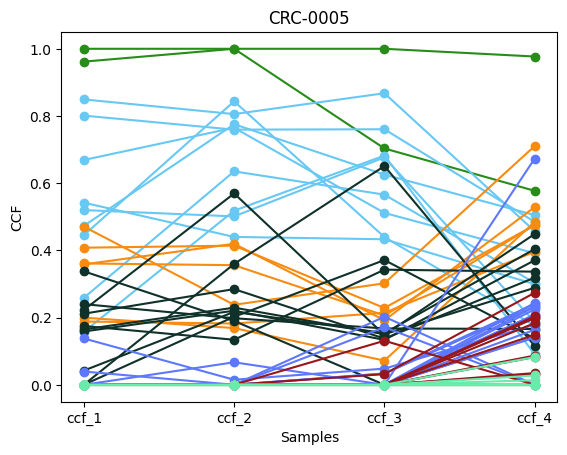

In [101]:
time_points = ['ccf_1', 'ccf_2', 'ccf_3', 'ccf_4']
for index, row in cll5_pd.iterrows():
    cluster = row['Cluster ID']
    plt.plot(time_points, row[time_points], marker='o', c= ClusterColors.get_hex_string(cluster+1))  
    plt.xlabel('Samples') 
    plt.ylabel('CCF')  
    plt.title('CRC-0005')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


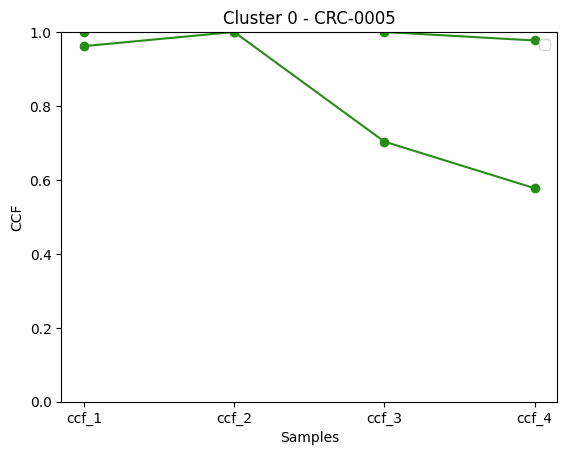

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


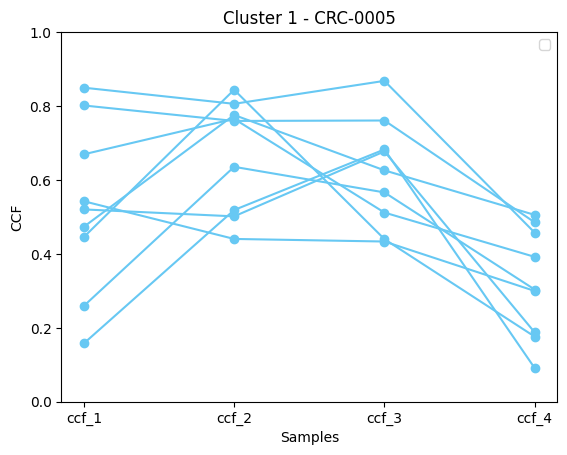

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


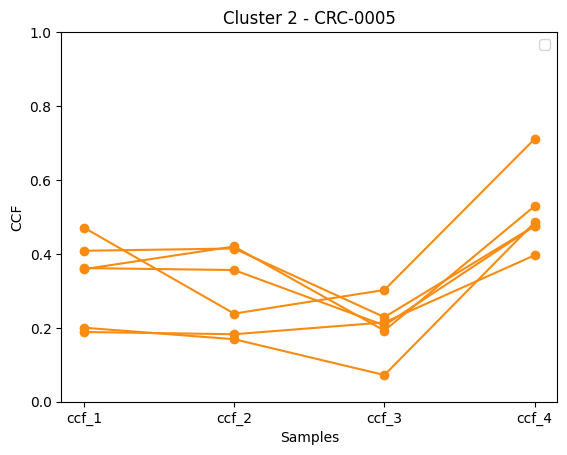

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


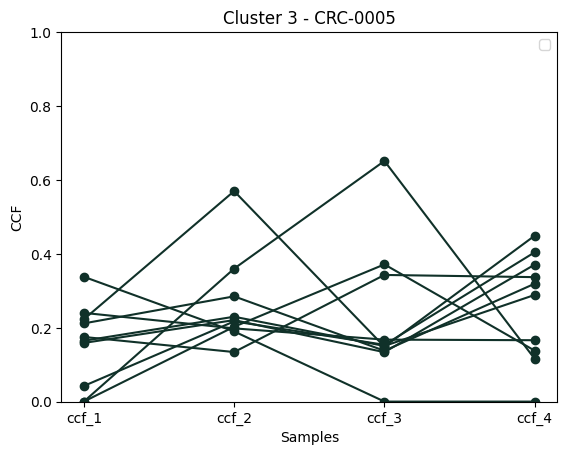

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


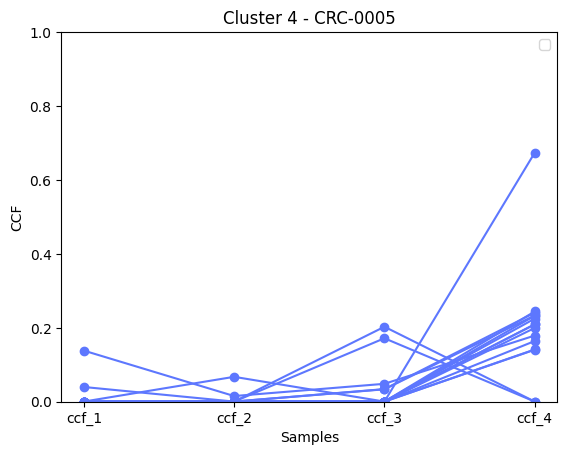

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


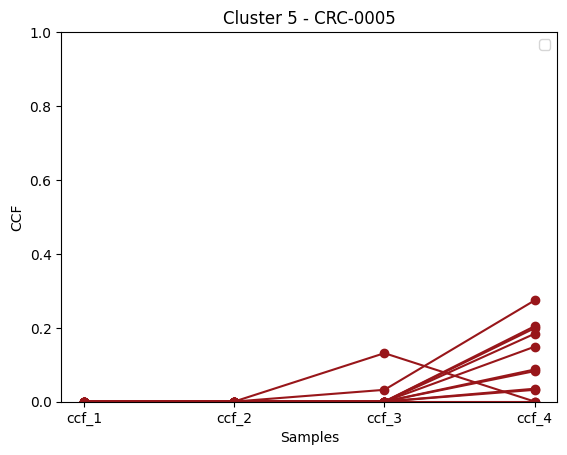

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


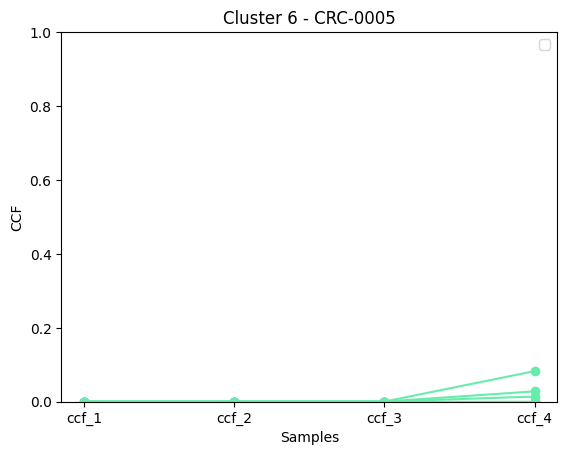

In [105]:
time_points = ['ccf_1', 'ccf_2', 'ccf_3', 'ccf_4']


# Group the data by 'Cluster ID' and create a separate plot for each cluster
for cluster, cluster_data in cll5_pd.groupby('Cluster ID'):
    plt.figure()  # Create a new figure for each plot
    for index, row in cluster_data.iterrows():
  
        plt.plot(time_points, row[time_points], marker='o',  c= ClusterColors.get_hex_string(cluster+1))
        plt.ylim(0, 1.0)
        plt.savefig(f'cluster_{cluster}_plot.png') 
    plt.xlabel('Samples')
    plt.ylabel('CCF')
    plt.title(f'Cluster {cluster} - CRC-0005')
    plt.legend()
    plt.show()

In [52]:
# CRC-0006

cll6_pd = snp_pd[snp_pd.Patient == 'Pt.06']
cll6_pd.reset_index(drop=True, inplace=True)


for i in range(4):
    new_column = 'ccf' + "_" + str(i+1)
    purity_column = 'Purity_' + str(i+1)
    ref_column = 'Ref_Count_' + str(i+1)
    alt_column = 'Alt_Count_' + str(i+1)
    
    cll6_pd[new_column] = cll6_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)

/var/folders/9x/hqvlwdys1x52ksgld763mth80000gp/T/ipykernel_58129/2479940542.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cll6_pd[new_column] = cll6_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)
/var/folders/9x/hqvlwdys1x52ksgld763mth80000gp/T/ipykernel_58129/2479940542.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cll6_pd[new_column] = cll6_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)
/var/folders/9x/hqvlwdys1x52ks

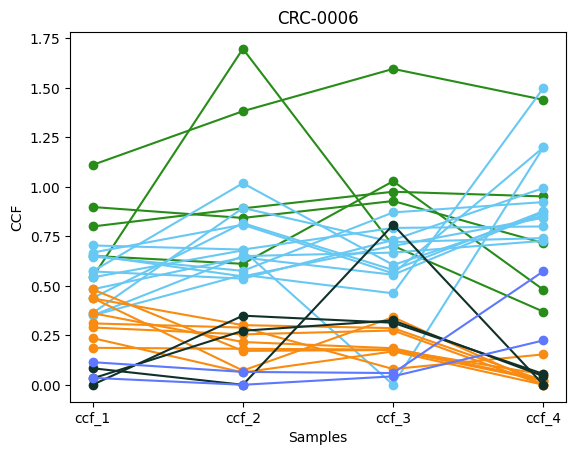

In [55]:
time_points = ['ccf_1', 'ccf_2', 'ccf_3', 'ccf_4']
for index, row in cll6_pd.iterrows():
    cluster = row['Cluster ID']
    plt.plot(time_points, row[time_points], marker='o', c= ClusterColors.get_hex_string(cluster+1))  
    plt.xlabel('Samples') 
    plt.ylabel('CCF')  
    plt.title('CRC-0006')

In [61]:
snp_pd

,Patient,HUGO Symbol,Protein Change,NCBI Build,Chromosome,Position,Variant Classification,Variant Type,Reference Allele,Tumor Sequenced Allele,...,Ref_Count_1,Purity_2,Alt_Count_2,Ref_Count_2,Purity_3,Alt_Count_3,Ref_Count_3,Purity_4,Alt_Count_4,Ref_Count_4
0,Pt.01,SF3B1,p.E622D,37,2,198267491,Missense_Mutation,SNP,C,G,...,27,0.741,48,41,0.571,29.0,45.0,0.664,29.0,23.0
1,Pt.01,ABCG2,p.R246Q,37,4,89039365,Missense_Mutation,SNP,C,T,...,34,0.741,32,40,0.571,15.0,34.0,0.664,18.0,22.0
2,Pt.01,KIAA0825,p.K37K,37,5,93872721,Silent,SNP,C,T,...,17,0.741,26,28,0.571,16.0,23.0,0.664,21.0,18.0
3,Pt.01,LATS1,p.E196G,37,6,150005638,Missense_Mutation,SNP,T,C,...,40,0.741,60,43,0.571,32.0,32.0,0.664,24.0,32.0
4,Pt.01,KCNMA1,p.R1186Q,37,10,78647178,Missense_Mutation,SNP,C,T,...,24,0.741,32,38,0.571,24.0,20.0,0.664,25.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Pt.21,DLGAP1,p.V784M,37,18,3534321,Missense_Mutation,SNP,C,T,...,80,0.860,3,43,0.662,0.0,43.0,NaN,NaN,NaN
1306,Pt.21,AC104534.3,p.*189L,37,19,39322152,Nonstop_Mutation,SNP,C,A,...,16,0.860,0,11,0.662,3.0,20.0,NaN,NaN,NaN
1307,Pt.21,DHX34,p.S403N,37,19,47861313,Missense_Mutation,SNP,G,A,...,22,0.860,0,36,0.662,3.0,38.0,NaN,NaN,NaN
1308,Pt.21,CPT1C,p.R577R,37,19,50213739,Silent,SNP,C,A,...,13,0.860,0,31,0.662,3.0,35.0,NaN,NaN,NaN


In [73]:
# CRC-0010

cll10_pd = snp_pd[snp_pd.Patient == 'Pt.10']
cll10_pd.reset_index(drop=True, inplace=True)


for i in range(5):
    new_column = 'ccf' + "_" + str(i+1)
    purity_column = 'Purity_' + str(i+1)
    ref_column = 'Ref_Count_' + str(i+1)
    alt_column = 'Alt_Count_' + str(i+1)
    
    cll10_pd[new_column] = cll10_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)

/var/folders/9x/hqvlwdys1x52ksgld763mth80000gp/T/ipykernel_58129/391784067.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cll10_pd[new_column] = cll10_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)
/var/folders/9x/hqvlwdys1x52ksgld763mth80000gp/T/ipykernel_58129/391784067.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cll10_pd[new_column] = cll10_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)
/var/folders/9x/hqvlwdys1x52

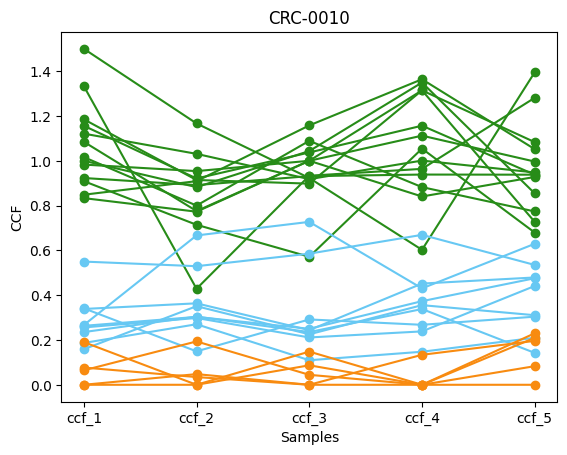

In [74]:
time_points = ['ccf_1', 'ccf_2', 'ccf_3', 'ccf_4', 'ccf_5']
for index, row in cll10_pd.iterrows():
    cluster = row['Cluster ID']
    plt.plot(time_points, row[time_points], marker='o', c= ClusterColors.get_hex_string(cluster+1))  
    plt.xlabel('Samples') 
    plt.ylabel('CCF')  
    plt.title('CRC-0010')

In [75]:
# CRC-0011

cll11_pd = snp_pd[snp_pd.Patient == 'Pt.11']
cll11_pd.reset_index(drop=True, inplace=True)


for i in range(5):
    new_column = 'ccf' + "_" + str(i+1)
    purity_column = 'Purity_' + str(i+1)
    ref_column = 'Ref_Count_' + str(i+1)
    alt_column = 'Alt_Count_' + str(i+1)
    
    cll11_pd[new_column] = cll10_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)

/var/folders/9x/hqvlwdys1x52ksgld763mth80000gp/T/ipykernel_58129/2134018540.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cll11_pd[new_column] = cll10_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)
/var/folders/9x/hqvlwdys1x52ksgld763mth80000gp/T/ipykernel_58129/2134018540.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cll11_pd[new_column] = cll10_pd.apply(lambda x: calc_ccf(x[purity_column], x[ref_column], x[alt_column]), axis=1)
/var/folders/9x/hqvlwdys1x

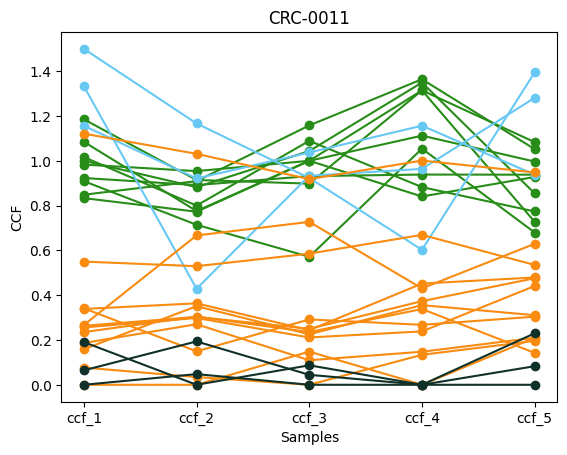

In [76]:
time_points = ['ccf_1', 'ccf_2', 'ccf_3', 'ccf_4', 'ccf_5']
for index, row in cll11_pd.iterrows():
    cluster = row['Cluster ID']
    plt.plot(time_points, row[time_points], marker='o', c= ClusterColors.get_hex_string(cluster+1))  
    plt.xlabel('Samples') 
    plt.ylabel('CCF')  
    plt.title('CRC-0011')